# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [7]:
# url_weather="http://api.openweathermap.org/data/2.5/weather?"
# url=f"{url_weather}appid={weather_api_key}&q={city}&units=imperial"
# print(url)
# response=requests.get(url)
# data=response.json()
# data

http://api.openweathermap.org/data/2.5/weather?appid=49ee555f2f3f850d8b4bab74120fe228&q=maniitsoq&units=imperial


{'coord': {'lon': -52.9, 'lat': 65.4167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 14.41,
  'feels_like': 3.27,
  'temp_min': 14.41,
  'temp_max': 14.41,
  'pressure': 999,
  'humidity': 82,
  'sea_level': 999,
  'grnd_level': 995},
 'visibility': 9097,
 'wind': {'speed': 9.53, 'deg': 72, 'gust': 10.4},
 'clouds': {'all': 100},
 'dt': 1615616896,
 'sys': {'country': 'GL', 'sunrise': 1615629450, 'sunset': 1615670681},
 'timezone': -10800,
 'id': 3421982,
 'name': 'Maniitsoq',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#checking for the URL query

count_city=1
set_city=1

city_data=[]
coord_lat=[]
coord_lon=[]
main_max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
dt=[]


print(os.linesep.join(['Beginning Data Retrieval', '-----------------------------']))

for city in cities:
    
    #retrive url and request the json file
    url_weather="http://api.openweathermap.org/data/2.5/weather?"
    query_url=f"{url_weather}appid={weather_api_key}&q={city}&units=imperial"
    weather_response=requests.get(query_url)
    weather_json=weather_response.json()
    
    #run loop on all cities with data needed.
    try:
        
        coord_lat.append(weather_json['coord']['lat'])
        coord_lon.append(weather_json['coord']['lon'])
        main_max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        city_data.append(city)
        print(f"Processing Record {count_city} of set {set_city}|{city}")
    except:
         print(f'City not found. Skipping...{city}')
            
    count_city+=1
    if count_city== 51:
        count_city=0
        set_city+=1
        

print(os.linesep.join([' ----------------------------- ','Data Retrieval Complete', '-----------------------------']))

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1|punta arenas
Processing Record 2 of set 1|emerald
Processing Record 3 of set 1|phan thiet
Processing Record 4 of set 1|kieta
Processing Record 5 of set 1|norman wells
Processing Record 6 of set 1|port lincoln
Processing Record 7 of set 1|limbang
Processing Record 8 of set 1|hobart
Processing Record 9 of set 1|shangrao
Processing Record 10 of set 1|ushuaia
City not found. Skipping...tsihombe
Processing Record 12 of set 1|avarua
Processing Record 13 of set 1|geraldton
Processing Record 14 of set 1|elat
Processing Record 15 of set 1|hithadhoo
Processing Record 16 of set 1|torbay
Processing Record 17 of set 1|zabid
Processing Record 18 of set 1|tiksi
Processing Record 19 of set 1|katsuura
Processing Record 20 of set 1|busselton
Processing Record 21 of set 1|hobyo
Processing Record 22 of set 1|wanaka
Processing Record 23 of set 1|yugorsk
Processing Record 24 of set 1|pinhao
Processing Record 25 of set 1|jame

Processing Record 6 of set 5|antalaha
City not found. Skipping...achisay
City not found. Skipping...barentsburg
Processing Record 9 of set 5|tanete
City not found. Skipping...nizhneyansk
Processing Record 11 of set 5|souillac
Processing Record 12 of set 5|trofors
Processing Record 13 of set 5|kyabe
Processing Record 14 of set 5|ust-kuyga
City not found. Skipping...lolua
Processing Record 16 of set 5|rocha
Processing Record 17 of set 5|polovinnoye
Processing Record 18 of set 5|yuci
Processing Record 19 of set 5|baft
Processing Record 20 of set 5|ust-nera
Processing Record 21 of set 5|padang
Processing Record 22 of set 5|poum
Processing Record 23 of set 5|tinskoy
Processing Record 24 of set 5|birmitrapur
Processing Record 25 of set 5|usinsk
Processing Record 26 of set 5|san ramon
Processing Record 27 of set 5|longyearbyen
Processing Record 28 of set 5|pingxiang
Processing Record 29 of set 5|cockburn town
Processing Record 30 of set 5|lompoc
City not found. Skipping...nguiu
Processing Rec

Processing Record 13 of set 9|luan
Processing Record 14 of set 9|cerritos
Processing Record 15 of set 9|maues
Processing Record 16 of set 9|umm kaddadah
Processing Record 17 of set 9|khani
Processing Record 18 of set 9|oktyabrskoye
Processing Record 19 of set 9|alice springs
Processing Record 20 of set 9|lakes entrance
Processing Record 21 of set 9|namibe
Processing Record 22 of set 9|rodino
Processing Record 23 of set 9|makakilo city
Processing Record 24 of set 9|tomatlan
City not found. Skipping...ndiekro
Processing Record 26 of set 9|preobrazheniye
Processing Record 27 of set 9|iqaluit
City not found. Skipping...attawapiskat
Processing Record 29 of set 9|barra patuca
Processing Record 30 of set 9|sorgun
Processing Record 31 of set 9|bud
Processing Record 32 of set 9|alyangula
City not found. Skipping...saryshagan
Processing Record 34 of set 9|westport
Processing Record 35 of set 9|lucapa
Processing Record 36 of set 9|aykhal
Processing Record 37 of set 9|bumba
Processing Record 38 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#!mkdir weather_CSV

city_dic={'City':city_data,
          'Lat':coord_lat,
          'lng':coord_lon,
          'Max Temp':main_max_temp,
          'Humidity':humidity,
          'Cloudiness':cloudiness,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':dt}
city_data_df=pd.DataFrame(city_dic)
city_data_df

#export the city data into .CSV
city_data_df.to_csv('weather_CSV/weather_data.csv')

#display the data frame.
city_data_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,46.00,45,20,19.57,CL,1615616962
1,emerald,-23.5333,148.1667,93.20,36,94,8.05,AU,1615617088
2,phan thiet,10.9333,108.1000,87.75,52,14,14.97,VN,1615617088
3,kieta,-6.2167,155.6333,82.47,71,100,6.26,PG,1615617088
4,norman wells,65.2820,-126.8329,-4.00,65,75,9.22,CA,1615617089
...,...,...,...,...,...,...,...,...,...
570,tuatapere,-46.1333,167.6833,60.21,75,0,2.57,NZ,1615617250
571,atambua,-9.1061,124.8925,80.51,81,99,2.04,ID,1615617250
572,puerto maldonado,-12.6000,-69.1833,70.61,97,100,1.50,PE,1615617250
573,carolina,18.3808,-65.9574,73.40,94,40,4.61,PR,1615617251


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#sortting all the values under humidity 
humidity_df=city_data_df.sort_values('Humidity',ascending=False)
humidity_df
#This step needs to be skiped since there is no values over 100 under humidity.

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
449,marienburg,54.0359,19.0266,36.00,100,100,12.71,PL,1615617215
458,iglesias,39.3114,8.5350,50.00,100,0,4.61,IT,1615617217
6,limbang,4.7500,115.0000,75.20,100,75,2.30,MY,1615617089
42,ketchikan,55.3422,-131.6461,33.80,100,90,9.22,US,1615617099
276,ewa beach,21.3156,-158.0072,69.80,100,90,12.66,US,1615617166
...,...,...,...,...,...,...,...,...,...
223,pyay,18.8167,95.2167,108.01,11,0,2.86,MM,1615617151
382,dhanera,24.5167,72.0167,95.36,9,0,6.85,IN,1615617197
37,meadow lake,34.8014,-106.5436,51.01,9,20,11.50,US,1615617098
323,hovd,48.0056,91.6419,57.47,9,100,26.60,MN,1615617179


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
# def imganalisys(columnX,columnY):
#     plt.scatter(city_data_df[""], city_data_df["columnY"], marker="o", s=15)
#     plt.xlabel("Latitude")
#     plt.grid(True)
#     return


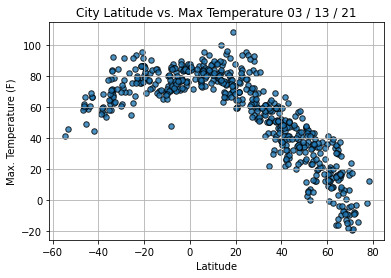

In [15]:
#!mkdir figure

#imganalisys('Lat','Max Temp')

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m / %d / %y")}')
plt.ylabel("Max. Temperature (F)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsTemperaturePlot.png")

plt.show()

## Latitude vs. Humidity Plot

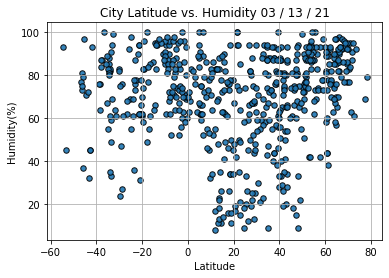

In [16]:
#imganalisys('Lat','Humidity')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m / %d / %y")}')
plt.ylabel("Humidity(%)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsHumidityPlot.png")

plt.show()

## Latitude vs. Cloudiness Plot

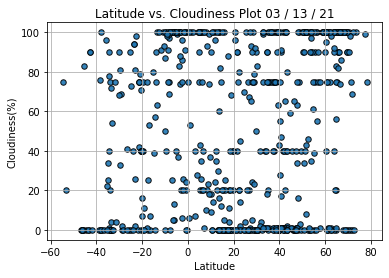

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Cloudiness Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsCloudinessPlot.png")

plt.show()

## Latitude vs. Wind Speed Plot

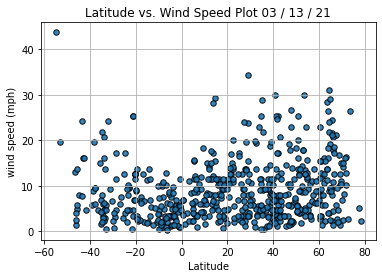

In [18]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Wind Speed Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsWindSpeedPlot.png")

plt.show()

## Linear Regression

In [19]:
#northen lat will provided all cities over the Ecuador line.
nh_df=city_data_df.loc[city_data_df["Lat"]>0.0]
#nh_df
mtN_df=nh_df.sort_values('Max Temp',ascending=False)
mtN_df.reset_index(inplace=True)
mtN_df


,index,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,223,pyay,18.8167,95.2167,108.01,11,0,2.86,MM,1615617151
1,555,sisophon,13.5859,102.9737,99.95,22,0,6.67,KH,1615617245
2,450,phetchabun,16.2500,101.0833,96.01,49,20,3.44,TH,1615617215
3,382,dhanera,24.5167,72.0167,95.36,9,0,6.85,IN,1615617197
4,429,narathiwat,6.3333,101.7500,95.00,62,20,9.22,TH,1615617209
...,...,...,...,...,...,...,...,...,...,...
404,461,fairbanks,64.8378,-147.7164,-16.01,76,1,2.62,US,1615616954
405,400,iqaluit,63.7506,-68.5145,-16.01,69,90,13.80,CA,1615616988
406,543,deputatskiy,69.3000,139.9000,-17.77,82,0,1.36,RU,1615617242
407,102,barrow,71.2906,-156.7887,-18.40,63,75,16.11,US,1615617071


In [20]:
#Southern lat will provided all cities under the Ecuador line.
sh_df=city_data_df.loc[city_data_df["Lat"]<0.0]
#sh_df
mt_df=sh_df.sort_values('Max Temp',ascending=False)
mt_df.reset_index(inplace=True)
mt_df

,index,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,134,mount isa,-20.7333,139.5000,95.00,31,79,6.91,AU,1615617126
1,1,emerald,-23.5333,148.1667,93.20,36,94,8.05,AU,1615617088
2,40,port alfred,-33.5906,26.8910,91.76,33,4,13.71,ZA,1615617099
3,215,port hedland,-20.3167,118.5667,91.40,66,71,12.66,AU,1615617148
4,110,carnarvon,-24.8667,113.6333,91.40,55,0,17.27,AU,1615616970
...,...,...,...,...,...,...,...,...,...,...
161,564,coihaique,-45.5752,-72.0662,49.05,97,83,5.73,CL,1615617248
162,155,santiago de chuco,-8.1500,-78.1833,47.73,96,97,1.57,PE,1615617132
163,0,punta arenas,-53.1500,-70.9167,46.00,45,20,19.57,CL,1615616962
164,261,ancud,-41.8697,-73.8203,44.60,93,0,4.61,CL,1615617161


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8301663051837057


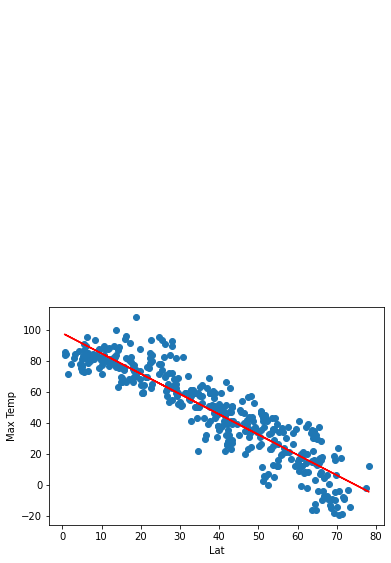

In [21]:
x_values = nh_df['Lat']
y_values = nh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,300),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3177113592748793


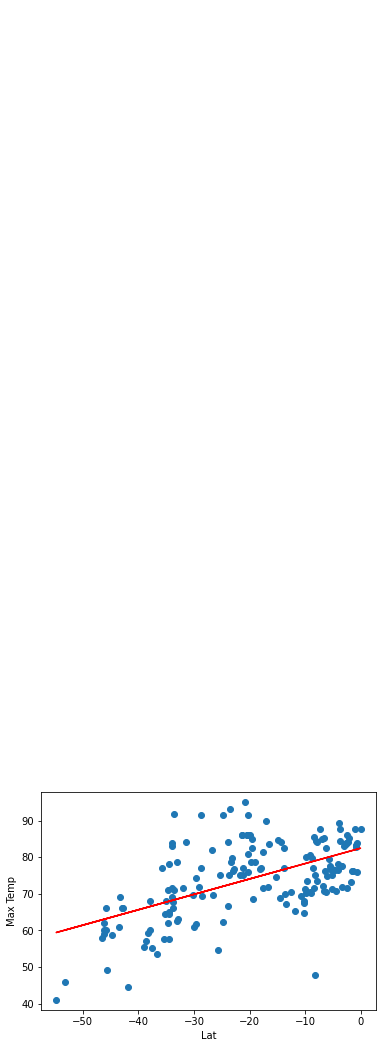

In [22]:
x_values = sh_df['Lat']
y_values = sh_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,309),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10770313623171485


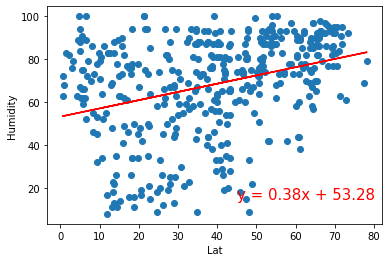

In [23]:
x_values = nh_df['Lat']
y_values = nh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereHumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.034123611026531366


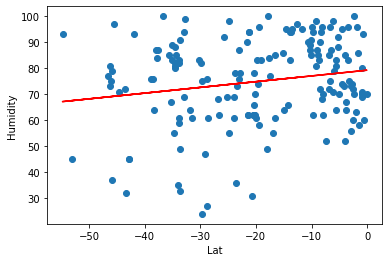

In [24]:
x_values = sh_df['Lat']
y_values = sh_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSouthernHemisphereHumidityS.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0436488315778475


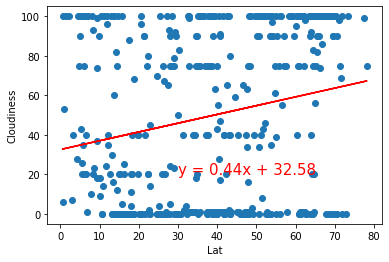

In [25]:
x_values = nh_df['Lat']
y_values = nh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereCloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18694239016815914


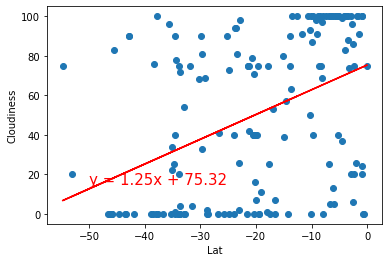

In [26]:
x_values = sh_df['Lat']
y_values = sh_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphereCloudinessS.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026271054998713312


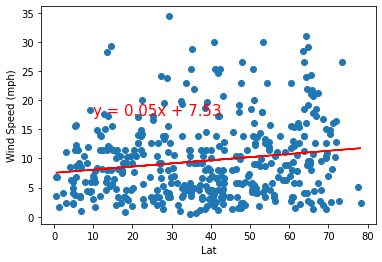

In [27]:
x_values = nh_df['Lat']
y_values = nh_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,17.5),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereWS.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13772602989112204


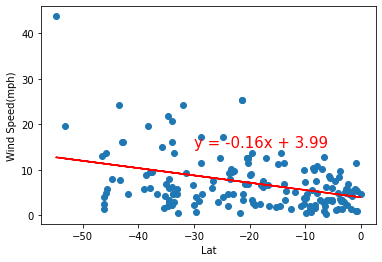

In [28]:
x_values = sh_df['Lat']
y_values = sh_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphereWSS.png")
plt.show()